<a href="https://colab.research.google.com/github/Boshjiggs1/IST-718-Big-Data-Analytics/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                   <h1><center>Assignment 2</center></h1>

Josh Biggs-Bauer

2/20/2022

IST 718

Dr. Fox

# Introduction
In lab 2 we focus on Time Series forecasting. In the first task we focus on four metro areas in Arkansas (Hot Springs, Little Rock, Fayetteville, Searcy). These metros have different zip codes, there fore we need to aggragate the data by metro are in order to visualize. The second task is to find three zip codes that we should invest in. The lab does not set specific criteria to select these zip codes.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # stats models
import statsmodels.formula.api as smf # Models similar to R

In [ ]:
pwd

'/Users/boshjiggs/Documents/Documents - Joshua’s Mac mini/IST 718'

In [ ]:
path = '/Users/boshjiggs/Documents/Documents - Joshua’s Mac mini/IST 718'

In [ ]:
fileName = 'Zip_Zhvi_SingleFamilyResidence'

In [ ]:
df = pd.read_csv(fileName + '.csv')

In [ ]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1413747.0,1405862.0,1402547.0,1390420.0,1381621.0,1375725.0,1374714.0,1381453.0,1385737.0,1389268.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,364892.0,...,974693.0,975616.0,975734.0,975251.0,974238.0,973104.0,971908.0,972038.0,973671.0,975642.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1528603.0,1514894.0,1502233.0,1492429.0,1486122.0,1480426.0,1476509.0,1478980.0,1479301.0,1474994.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200475.0,...,335536.0,335878.0,335940.0,336092.0,336119.0,336083.0,336154.0,335860.0,336037.0,336483.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,546663.0,...,1207765.0,1208853.0,1208481.0,1206304.0,1204013.0,1201182.0,1198879.0,1198277.0,1199900.0,1200980.0


# PreAnalysis

In [ ]:
df['RegionID'].nunique()

30464

In [ ]:
df.describe()

,RegionID,SizeRank,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
count,30464.000000,30464.000000,30464.000000,1.322400e+04,1.347200e+04,1.351000e+04,1.353200e+04,1.361700e+04,1.365200e+04,1.367500e+04,...,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04,3.046400e+04
mean,80411.444032,15971.949875,48773.301110,1.287668e+05,1.284274e+05,1.283393e+05,1.283755e+05,1.284372e+05,1.284450e+05,1.287817e+05,...,2.316270e+05,2.322013e+05,2.328094e+05,2.334704e+05,2.341255e+05,2.347233e+05,2.353932e+05,2.361603e+05,2.370185e+05,2.378982e+05
std,25500.467961,9602.814124,27437.793823,8.932606e+04,8.923079e+04,8.908503e+04,8.891757e+04,8.878505e+04,8.866373e+04,9.173599e+04,...,2.744219e+05,2.745258e+05,2.745434e+05,2.747149e+05,2.748821e+05,2.751632e+05,2.759450e+05,2.772066e+05,2.787410e+05,2.801460e+05
min,58001.000000,0.000000,501.000000,1.067200e+04,1.065500e+04,1.067300e+04,1.066800e+04,1.067700e+04,1.059500e+04,1.047700e+04,...,1.051600e+04,1.056000e+04,1.059900e+04,1.067800e+04,1.073700e+04,1.086000e+04,1.103500e+04,1.121800e+04,1.137200e+04,1.149200e+04
25%,68822.750000,7688.000000,25867.250000,7.188575e+04,7.167675e+04,7.167450e+04,7.179450e+04,7.187400e+04,7.197175e+04,7.207500e+04,...,1.035932e+05,1.040092e+05,1.043135e+05,1.046772e+05,1.049818e+05,1.052908e+05,1.056270e+05,1.058540e+05,1.061430e+05,1.064082e+05
50%,79170.500000,15497.000000,48313.500000,1.083435e+05,1.078815e+05,1.077805e+05,1.078935e+05,1.078990e+05,1.080335e+05,1.082100e+05,...,1.608075e+05,1.614010e+05,1.621690e+05,1.627390e+05,1.634350e+05,1.640095e+05,1.645335e+05,1.650715e+05,1.655705e+05,1.660700e+05
75%,89238.250000,24073.000000,71740.500000,1.604298e+05,1.598525e+05,1.596290e+05,1.595368e+05,1.595160e+05,1.598925e+05,1.601715e+05,...,2.621595e+05,2.631830e+05,2.641112e+05,2.649178e+05,2.658900e+05,2.666098e+05,2.674230e+05,2.683828e+05,2.692755e+05,2.702558e+05
max,753844.000000,35187.000000,99929.000000,1.749532e+06,1.744909e+06,1.726037e+06,1.696812e+06,1.649586e+06,1.602308e+06,2.920398e+06,...,8.665174e+06,8.704005e+06,8.653878e+06,8.558984e+06,8.451378e+06,8.356810e+06,8.303433e+06,8.293072e+06,8.271645e+06,8.221444e+06


In [ ]:
dates = df.columns.values[9:]

# Part 1
- Develop timeseries plots for Hot Springs, Little Rock, Fayetville, Searcy
- Show all values from 1997 to current day
- Display the averages at the metro level

In [ ]:
cityOfInterest = ['Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy']

In [ ]:
arCity = df.loc[df['Metro'].isin(cityOfInterest)].reset_index(drop=True)

In [ ]:
arCity['Metro'].unique()

array(['Fayetteville', 'Hot Springs', 'Searcy'], dtype=object)

## Little Rock does not have a Metro area

In [ ]:
df.loc[df['City'] == 'Little Rock'].head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
2610,89442,2628,72204,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,47506.0,...,72297.0,72162.0,72250.0,72332.0,72976.0,73492.0,74355.0,75124.0,76106.0,76895.0
3176,89446,3203,72209,Zip,AR,AR,Little Rock,Little Rock-North Little Rock-Conway,Pulaski County,48395.0,...,73613.0,73328.0,72997.0,72800.0,73261.0,73445.0,73738.0,73768.0,74577.0,75424.0


Little Rock Metro area is Little Rock-Conway.

In [ ]:
lr = df.loc[[False if pd.isnull(x) else x for x in df['Metro'].str.contains('Little Rock')]]

Append the Little Rock Metro area in the dataset.

In [ ]:
arCity = pd.concat([arCity, lr])

In [ ]:
arCity.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,69849,215,28314,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,91738.0,...,124299.0,124389.0,124643.0,124785.0,125022.0,125708.0,126576.0,127449.0,127791.0,128149.0
1,89249,332,71913,Zip,AR,AR,Hot Springs,Hot Springs,Garland County,91204.0,...,158061.0,158528.0,159213.0,160118.0,161110.0,161806.0,162347.0,163134.0,164485.0,166238.0
2,69842,1309,28306,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,113111.0,...,159607.0,159496.0,159711.0,160011.0,160450.0,161232.0,162215.0,163196.0,163748.0,164245.0
3,69902,1457,28376,Zip,NC,NC,Raeford,Fayetteville,Hoke County,NaN,...,178186.0,178673.0,179091.0,179431.0,179704.0,179780.0,179884.0,179991.0,180248.0,180527.0
4,69847,1535,28311,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,99811.0,...,135627.0,135708.0,136097.0,136413.0,136634.0,137330.0,138309.0,139264.0,139653.0,140037.0


In [ ]:
arCity['Metro'].unique()

array(['Fayetteville', 'Hot Springs', 'Searcy',
       'Little Rock-North Little Rock-Conway'], dtype=object)

# Only looking at 1997 forward

In [ ]:
on97 = [x for x in dates if np.datetime64(x) >= np.datetime64('1997-01')]

In [ ]:
on97[:5]

['1997-01-31', '1997-02-28', '1997-03-31', '1997-04-30', '1997-05-31']

In [ ]:
on97Dates = [np.datetime64(x) for x in on97] # Convert Strings to np.datetime64

# Group by Metro Area

In [ ]:
arCityAv = arCity[['Metro']+on97].groupby(['Metro']).agg(np.nanmean)

In [ ]:
arCityAv

,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
Metro,,,,,,,,,,,,,,,,,,,,,
Fayetteville,100072.230769,100048.923077,100061.769231,100058.000000,100183.769231,100066.923077,100088.615385,100135.538462,100378.076923,100122.692308,...,137884.812500,137801.062500,138057.625000,138239.375000,138617.500000,139208.687500,139931.437500,140591.125000,140992.875000,141523.312500
Hot Springs,77182.600000,77657.400000,77872.800000,77722.000000,77370.400000,77363.800000,77931.200000,78521.000000,79080.400000,78898.800000,...,130194.714286,130269.714286,130643.285714,131520.857143,132674.000000,133555.714286,134451.857143,135230.142857,136497.142857,137892.571429
Little Rock-North Little Rock-Conway,87378.959184,87692.673469,87890.285714,88178.959184,88397.102041,88617.755102,88776.408163,89037.326531,89457.693878,89739.448980,...,137957.419355,137967.725806,138232.258065,138562.548387,139092.919355,139401.790323,139585.387097,139714.419355,139935.032258,140491.000000
Searcy,57560.583333,57887.666667,58211.000000,58466.000000,58640.083333,58765.833333,58921.583333,59028.333333,59160.333333,59267.333333,...,87910.222222,88080.166667,87890.888889,87739.555556,87566.888889,87297.888889,86611.722222,86112.388889,86010.611111,86115.611111


# Plot Time Series

Text(0, 0.5, 'Median House Price')

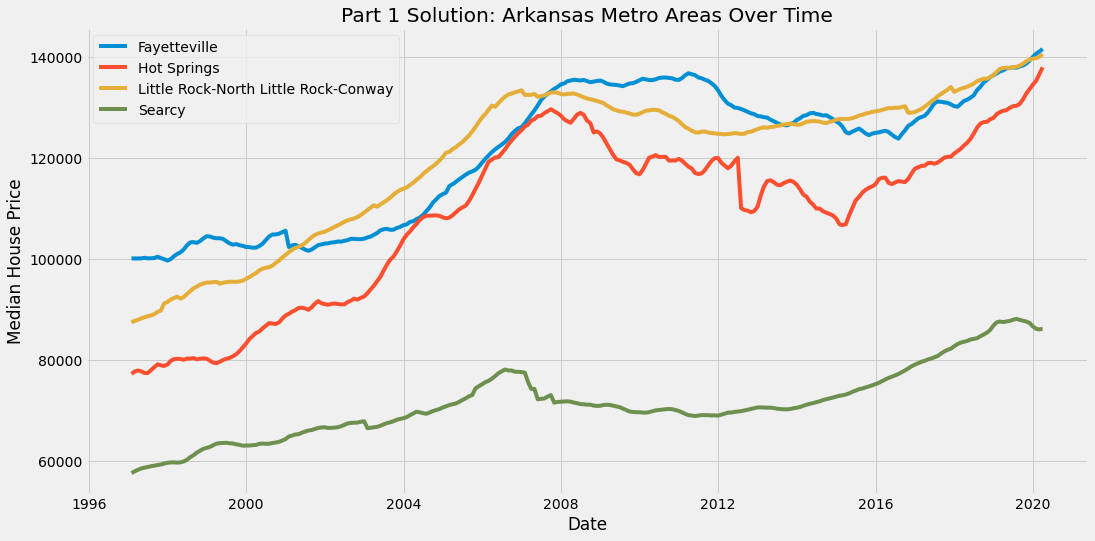

In [ ]:
plt.figure(figsize=(16,8))

for idx, row in arCityAv.iterrows():
    plt.plot(on97Dates, row[on97].values, label=idx)
plt.legend()
plt.title('Part 1 Solution: Arkansas Metro Areas Over Time')
plt.xlabel('Date')
plt.ylabel('Median House Price')

# Part 2

In this section we try to see if we can predict which three zip codes are the best investment for the Syracuse Real Estate Investment Trust (SREIT). 

## Clear all columns prior to 1997

In [ ]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'],
      dtype='object', length=300)

# Analyze dataset
## Check for duplicates

In [ ]:
df['RegionID'].value_counts().sort_values().max()

1

There were no duplicated regions.

# Time Series Plot

Text(0, 0.5, 'Median House Price')

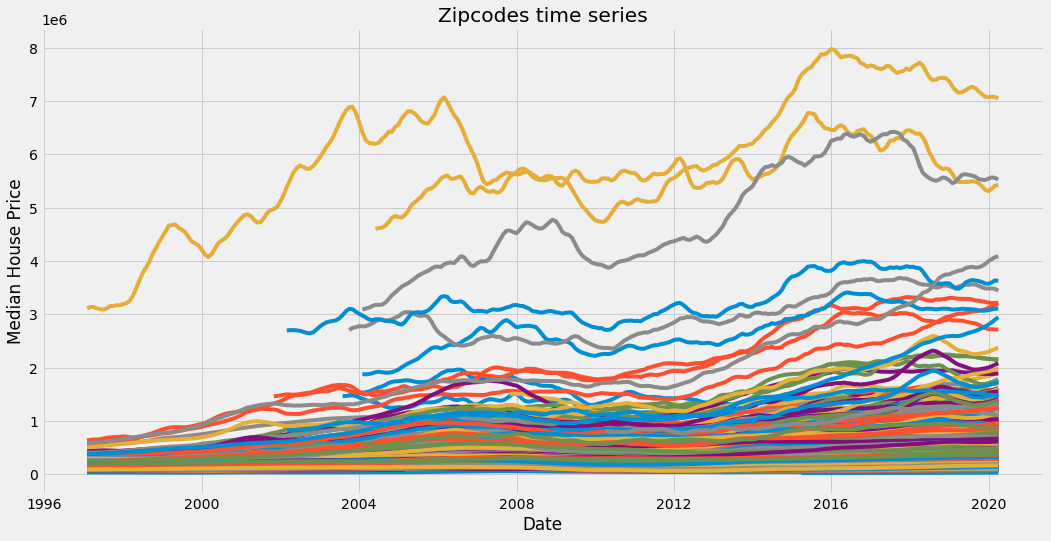

In [ ]:
plt.figure(figsize=(16,8))

for idx, row in df.iloc[:1000].iterrows():
    plt.plot(on97Dates, row[on97].values, label=idx)
# plt.legend()
plt.title('Zipcodes time series')
plt.xlabel('Date')
plt.ylabel('Median House Price')


A majority of the zip codes are under a million dollars. 

# Check when all zip codes have a value

In [ ]:
counts = []
for date in on97:
    counts.append(df[date].count())
on97Counts = pd.DataFrame(zip(on97, counts), columns=['Date', 'Count'])
on97Counts['Date'] = on97Counts['Date'].astype(np.datetime64)

TypeError: 'numpy.int64' object is not callable

Text(0, 0.5, 'Number of Zipcodes Popuated')

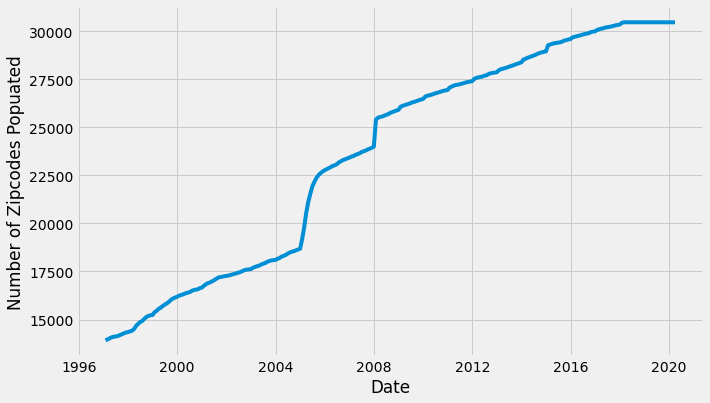

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(on97Counts['Date'], on97Counts['Count'])
plt.xlabel('Date')
plt.ylabel('Number of Zipcodes Popuated')

In [ ]:
on97Counts.loc[on97Counts['Count'] == len(df)].head()

,Date,Count
253,2018-02-28,30464
254,2018-03-31,30464
255,2018-04-30,30464
256,2018-05-31,30464
257,2018-06-30,30464


Beginning in 2018 all of the zip codes are populated. We will not have to drop any of the zip codes because we are predicting for current day. 

In [ ]:
on97Counts.loc[on97Counts['Date'].astype(str).str.contains('2020')].tail(3)

,Date,Count
276,2020-01-31,30464
277,2020-02-29,30464
278,2020-03-31,30464


In [ ]:
on97Counts.loc[on97Counts['Date'].astype(str).str.contains('1997')].head(3)

,Date,Count
0,1997-01-31,13913
1,1997-02-28,13961
2,1997-03-31,14019


1997 has 13,913 zip codes that are populated. 

# Counts per Zip Code
### We need to transform some of the data to calculate counts per zip code

In [ ]:
dd = df.drop(['SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], axis=1)

In [ ]:
dd = dd.set_index('RegionID')

In [ ]:
dp = dd.transpose()

In [ ]:
dp.head()

RegionID,61639,84654,61637,91982,84616,91940,61616,91733,93144,84640,...,59484,59376,60758,58084,58112,58111,58115,58117,58121,58125
1996-01-31,NaN,364892.0,NaN,200475.0,546663.0,97521.0,NaN,97381.0,82374.0,254388.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-29,NaN,364162.0,NaN,200723.0,546231.0,97513.0,NaN,97405.0,82330.0,252774.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-31,NaN,363605.0,NaN,200526.0,545451.0,97471.0,NaN,97330.0,82300.0,251468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-30,NaN,362963.0,NaN,199337.0,545391.0,97491.0,NaN,97323.0,82263.0,248948.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-31,NaN,361660.0,NaN,198200.0,543066.0,97486.0,NaN,97280.0,82344.0,246695.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
zipCount = dp.count()

<AxesSubplot:ylabel='Density'>

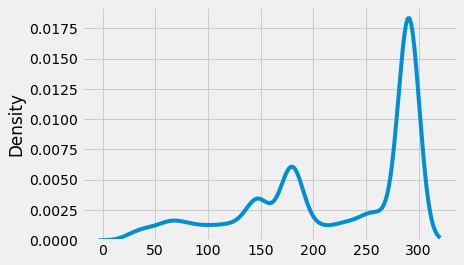

In [ ]:
sns.kdeplot(zipCount)

In [ ]:
zipCount.describe()

count    30464.000000
mean       221.713892
std         78.132404
min         26.000000
25%        170.000000
50%        256.000000
75%        291.000000
max        291.000000
dtype: float64

Most of the zip codes have between 250 and 300. 

# Group zip codes by year to check for correlation

In [ ]:
dyear = dp.copy()

In [ ]:
dyear.index.name = 'ds'
dyear = dyear.reset_index(drop=False)

In [ ]:
dyear['year'] = dyear['ds'].astype(str).str[0:4]

In [ ]:
dyear = dyear.groupby(['year']).mean().reset_index(drop=False)

(-5.0, 600000.0)

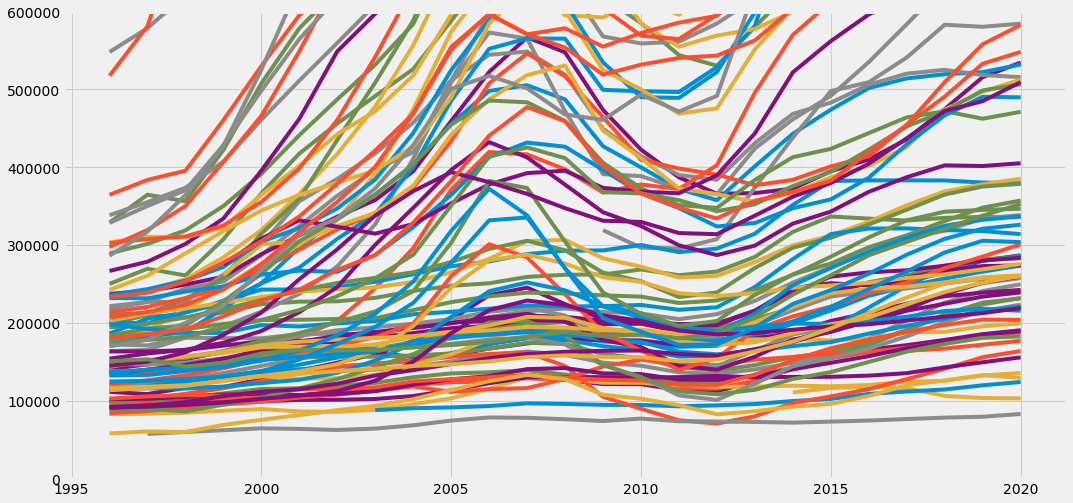

In [ ]:
plt.figure(figsize=(16,8))
for col in dyear.columns[1:100]:
    plt.plot(dyear['year'].astype(int), dyear[col])
    
plt.ylim(-5, 600000)

We can see a big dip in the housing prices due to the 2008 housing crisis. Due to lack of compute power, we will only fit the model with data from after 2010, when the data seemingly plateaus. 

In [ ]:
lowerDataLim = np.datetime64('2011-01-01')

# Split training and testing data
To create a model to answer the question, we need to create a training and testing dataset. 

## Find most recent date

In [ ]:
testDate = on97Counts['Date'].max()
print('Test Date on Dataset: ', testDate)

Test Date on Dataset:  2020-03-31 00:00:00


In [ ]:
trainDate = on97Counts['Date'].max() - np.timedelta64(6, 'M')
trainDate = on97Counts.loc[on97Counts['Date'] < trainDate]['Date'].values[-1]
print('Train Target Date on Dataset: ', trainDate)

Train Target Date on Dataset:  2019-09-30T00:00:00.000000000


# Create Facebook Prophet Model

In [ ]:
from fbprophet import Prophet

In [ ]:
dp.columns.name = None # Get rid of column name
dp.index.names = ['ds'] # Convert Date columns to ds

In [ ]:
zipCodes = dp.columns # Get list of Zip Codes

In [ ]:
zipCodes = np.sort(zipCodes)

In [ ]:
dp = dp.reset_index(drop=False)  # Make Date a column rather than the index

In [ ]:
dp['ds'] = dp['ds'].astype(np.datetime64)

# Create data frame with predicted values

In [ ]:
future = pd.DataFrame([trainDate, testDate], columns=['ds'])

In [ ]:
future

,ds
0,2019-09-30
1,2020-03-31


## Fit model using the target training date

In [ ]:
dp = dp.loc[((dp['ds'] <= trainDate) & (dp['ds'] >= lowerDataLim))].reset_index(drop=True) # Get subset of data used to train the model

In [ ]:
 predictions = []
 count = 0
 for zip in zipCodes[5000:10000]:
     m = Prophet(uncertainty_samples=0, interval_width=0.95, weekly_seasonality=False, daily_seasonality=False) # Define Prophet Model For Zip Code

     dtemp = dp[['ds', zip]].rename(columns={zip: 'y', 'ds': 'ds'}) # Convert columns to Prophet-friendly columns 
     dtemp = dtemp.dropna(axis=0) # Drop unpopulated dates
  
     m.fit(dtemp) # Fit series

     preds = m.predict(future)[['ds', 'yhat']] # Predict the train date and test date values

  
     predictions.append([zip, dtemp.loc[dtemp['ds'] == trainDate]['y'].values[0], 
                       preds['yhat'].values[0], preds['yhat'].values[1]]) # append data to the file dataset
  
     print(count)
     count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


26
27
28
29
30
31
32
33
34


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


35
36
37
38
39
40
41
42
43
44
45
46
47
48


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


49
50
51


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


52
53
54
55


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


56
57
58


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


59
60
61
62
63
64
65
66


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375


INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


2550
2551
2552
2553
2554


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


2555


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


2556
2557
2558


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


2559


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


2560
2561
2562


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


2563


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589


INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738


INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


3733
3734
3735
3736
3737


INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795


INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


3796
3797
3798
3799
3800


INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


3801
3802
3803
3804
3805
3806


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


3824
3825


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032


INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772


In [ ]:
len(predictions)

5000

# Calculate accuracy and growth opportunity

## Create data frame with zip code info

In [ ]:
zipPred = pd.DataFrame(predictions, columns=['zipcode', 'train', 'train_pred', 'test_pred']) # Create Dataframe with predictions per zipcode

In [ ]:
 zipPred.to_csv(path + 'PredictionData12.csv') # Save Prediction to a CSV file since we do not want to run model more than once

In [ ]:
 zipPred.head()

,zipcode,train,train_pred,test_pred
0,64913,165063.0,163523.817677,169355.175260
1,64914,153625.0,153014.264972,156431.092390
2,64916,163637.0,164278.530576,167613.768081
3,64917,182948.0,183484.270367,188053.832820
4,64918,172712.0,174569.038803,179337.467058


In [ ]:
conda install -c conda-forge fbprophet

Solving environment: | ^C
- 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
zipPred = preds.copy()

# Calculate Error within training prediction
By calculating the error within this training dataset, we can investigate the risk associated with investing in a certain zip code. If there is a higher error rate, this means that the zip code is highly volatile. 

In [ ]:
zipPred['trainError'] = 100*(zipPred['train'] - zipPred['train_pred']) / zipPred['train']

## Calculate Growth Percentage

We want to see the growth percentage from the test target date. We use the models that predict 6 months from the training data. We will get an increase or decrease in the percentage. We want to steer away from the decreased growth areas, and look at the increase growth areas. 

In [ ]:
zipPred['GrowthPerc'] = 100*(zipPred['test_pred'] - zipPred['train']) / zipPred['train']

# Finding the Best Zip Codes

Text(0, 0.5, 'Growth Percentage')

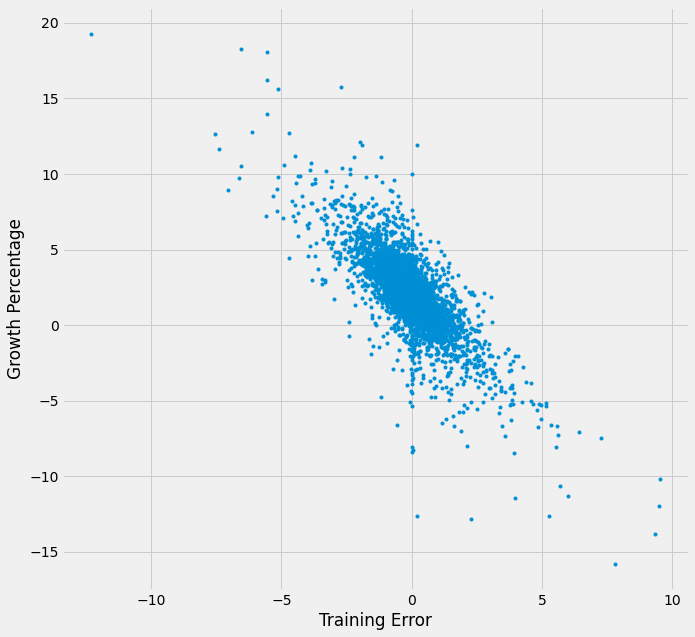

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(zipPred['trainError'],zipPred['GrowthPerc'], lw=0, marker='.')

plt.xlabel('Training Error')
plt.ylabel('Growth Percentage')

(-1.0, 15.0)

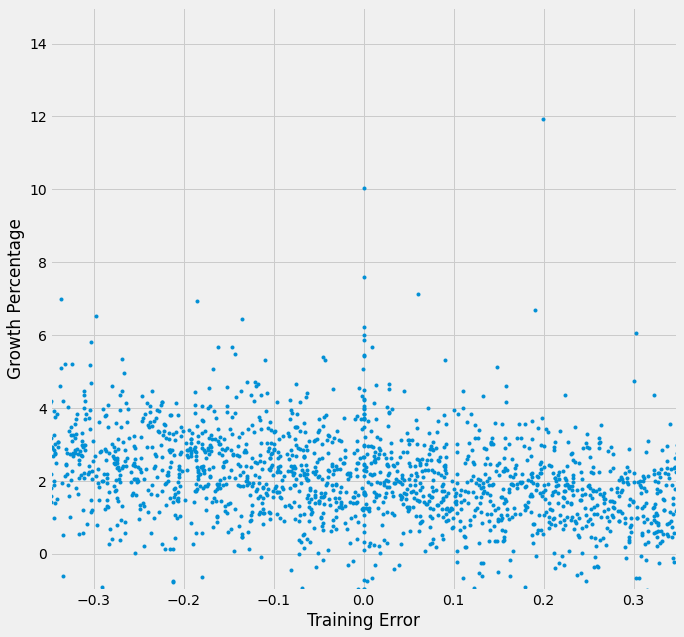

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(zipPred['trainError'],zipPred['GrowthPerc'], lw=0, marker='.')

plt.xlabel('Training Error')
plt.ylabel('Growth Percentage')

plt.xlim(-.348, .348)
plt.ylim(-1, 15)

This chart shows us the best zip codes to invest in. The closer the zip code is to the 0.0 error, and the higher up on the y-axis the better. This means that there is a better chance at growth within these areas. 

In [ ]:
zipPred['trainError'].describe()

count    5000.000000
mean       -0.074760
std         1.191880
min       -12.327526
25%        -0.615864
50%        -0.053248
75%         0.455635
max         9.540059
Name: trainError, dtype: float64

In [ ]:
best3 = zipPred.loc[((zipPred['trainError'] < .09) & (zipPred['trainError'] > -0.09))].sort_values(['GrowthPerc'], ascending=False).head(3)

(-1.0, 15.0)

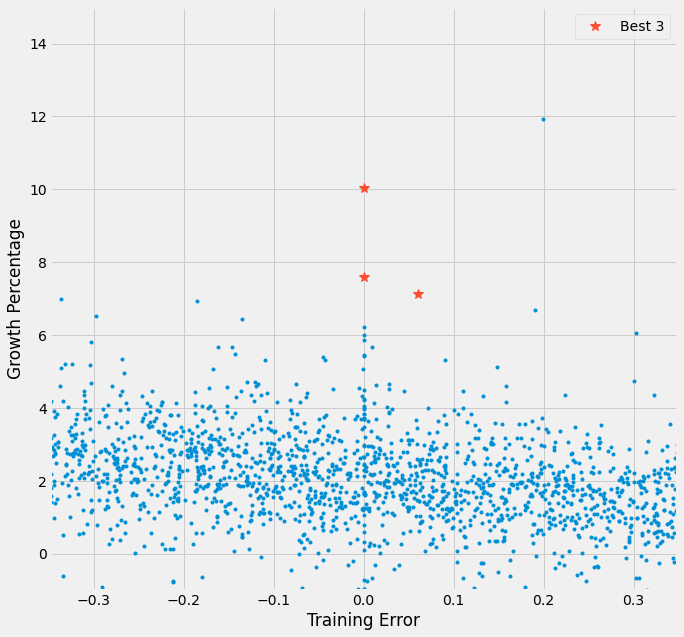

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(zipPred['trainError'],zipPred['GrowthPerc'], lw=0, marker='.')

plt.plot(best3['trainError'],best3['GrowthPerc'], lw=0, marker='*', markersize=10, label='Best 3')

plt.xlabel('Training Error')
plt.ylabel('Growth Percentage')
plt.legend()
plt.xlim(-.348, .348)
plt.ylim(-1, 15)

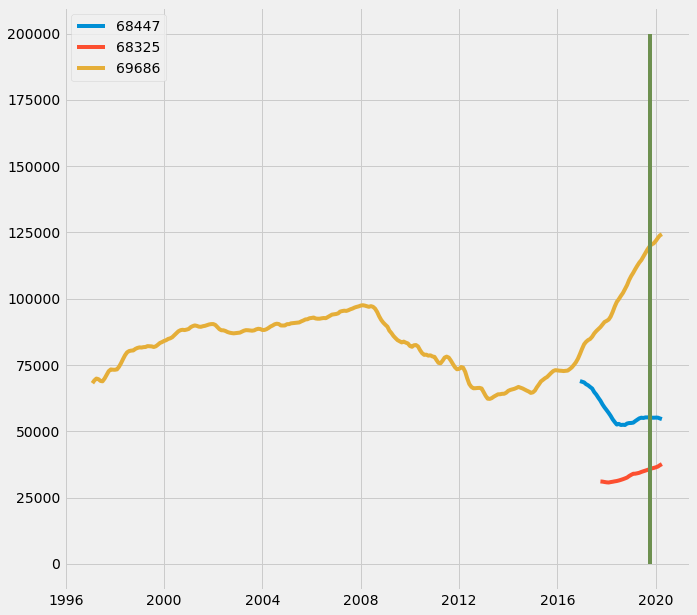

In [ ]:
plt.figure(figsize=(10,10))

for zip in best3['zipcode']:
    
    temp = df.loc[df['RegionID'] == zip]
    
    dateL = []
    dateS = []
    for col in on97:
        if pd.isnull(df.loc[df['RegionID'] == zip][col].values[0]):
            continue
        else:
            dateS.append(col)
            dateL.append(np.datetime64(col))
    
    plt.plot(dateL, df.loc[df['RegionID'] == zip][dateS].values[0], label=zip)
    
plt.plot([trainDate, trainDate],[0, 200000])

plt.legend()

# Conclusion

When looking for the best zip codes to invest in, we need to take a look at he least risk for training error. Next, we would need to look at the percentage growth in descending order.The above plot shows the 3 best zip codes. 